In [1]:
from itertools import chain
from itertools import product
import numpy as np
import anndata as ad
import pandas as pd

import scanpy as sc
import scanpy.external as sce

# import scvelo as scv
# import cellrank as cr
import seaborn as sns
from scipy import io
from scipy import sparse

import gc
gc.enable()

In [2]:
import os
os.chdir('/local/workdir/dwm269/scCardiacOrganoid/')

In [3]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

In [4]:
# Load metadata
meta = pd.read_csv("resources/metadata.csv")
meta = meta.loc[meta["source"]=="Hoang et al",]
meta = meta.loc[meta["include"],]
meta.index = list(range(0, len(meta)))
meta

,sample,include,data.dir,pattern,pattern_int,timepoint,time_int,cell_line,source,soupx,soupx_rho_GeneFull
0,D0_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D0,0,GCaMP6f hiPSCs,Hoang et al,False,NaN
1,D1_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D1,1,GCaMP6f hiPSCs,Hoang et al,False,NaN
2,D4_200um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,200um,200.0,D4,4,GCaMP6f hiPSCs,Hoang et al,True,0.076
3,D4_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D4,4,GCaMP6f hiPSCs,Hoang et al,True,0.070
4,D4_1000um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,1000um,1000.0,D4,4,GCaMP6f hiPSCs,Hoang et al,True,0.140
5,D6_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D6,6,GCaMP6f hiPSCs,Hoang et al,True,0.029
6,D8_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D8,8,GCaMP6f hiPSCs,Hoang et al,True,0.015
7,D12_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D12,12,GCaMP6f hiPSCs,Hoang et al,True,0.017
8,D21_200um_B,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,200um,200.0,D21,21,GCaMP6f hiPSCs,Hoang et al,True,0.011
9,D21_600um,True,/workdir/dwm269/scCardiacOrganoid/data/STARsol...,600um,600.0,D21,21,GCaMP6f hiPSCs,Hoang et al,True,0.039


# Load and subset data

In [6]:
adata = sc.read_h5ad(
    filename="data/pyobjs/scCO_v7-2.h5ad" 
)

# adata = adata[adata.obs[]]

# https://github.com/scverse/scanpy/issues/2239
adata.uns['log1p']["base"] = None 

In [7]:
tmp_cell_types = ['Definitive_Endoderm', 'Foregut_Epithelium', 'Liver_Progenitors'] 
adata = adata[adata.obs['cell_types'].isin(tmp_cell_types)]

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


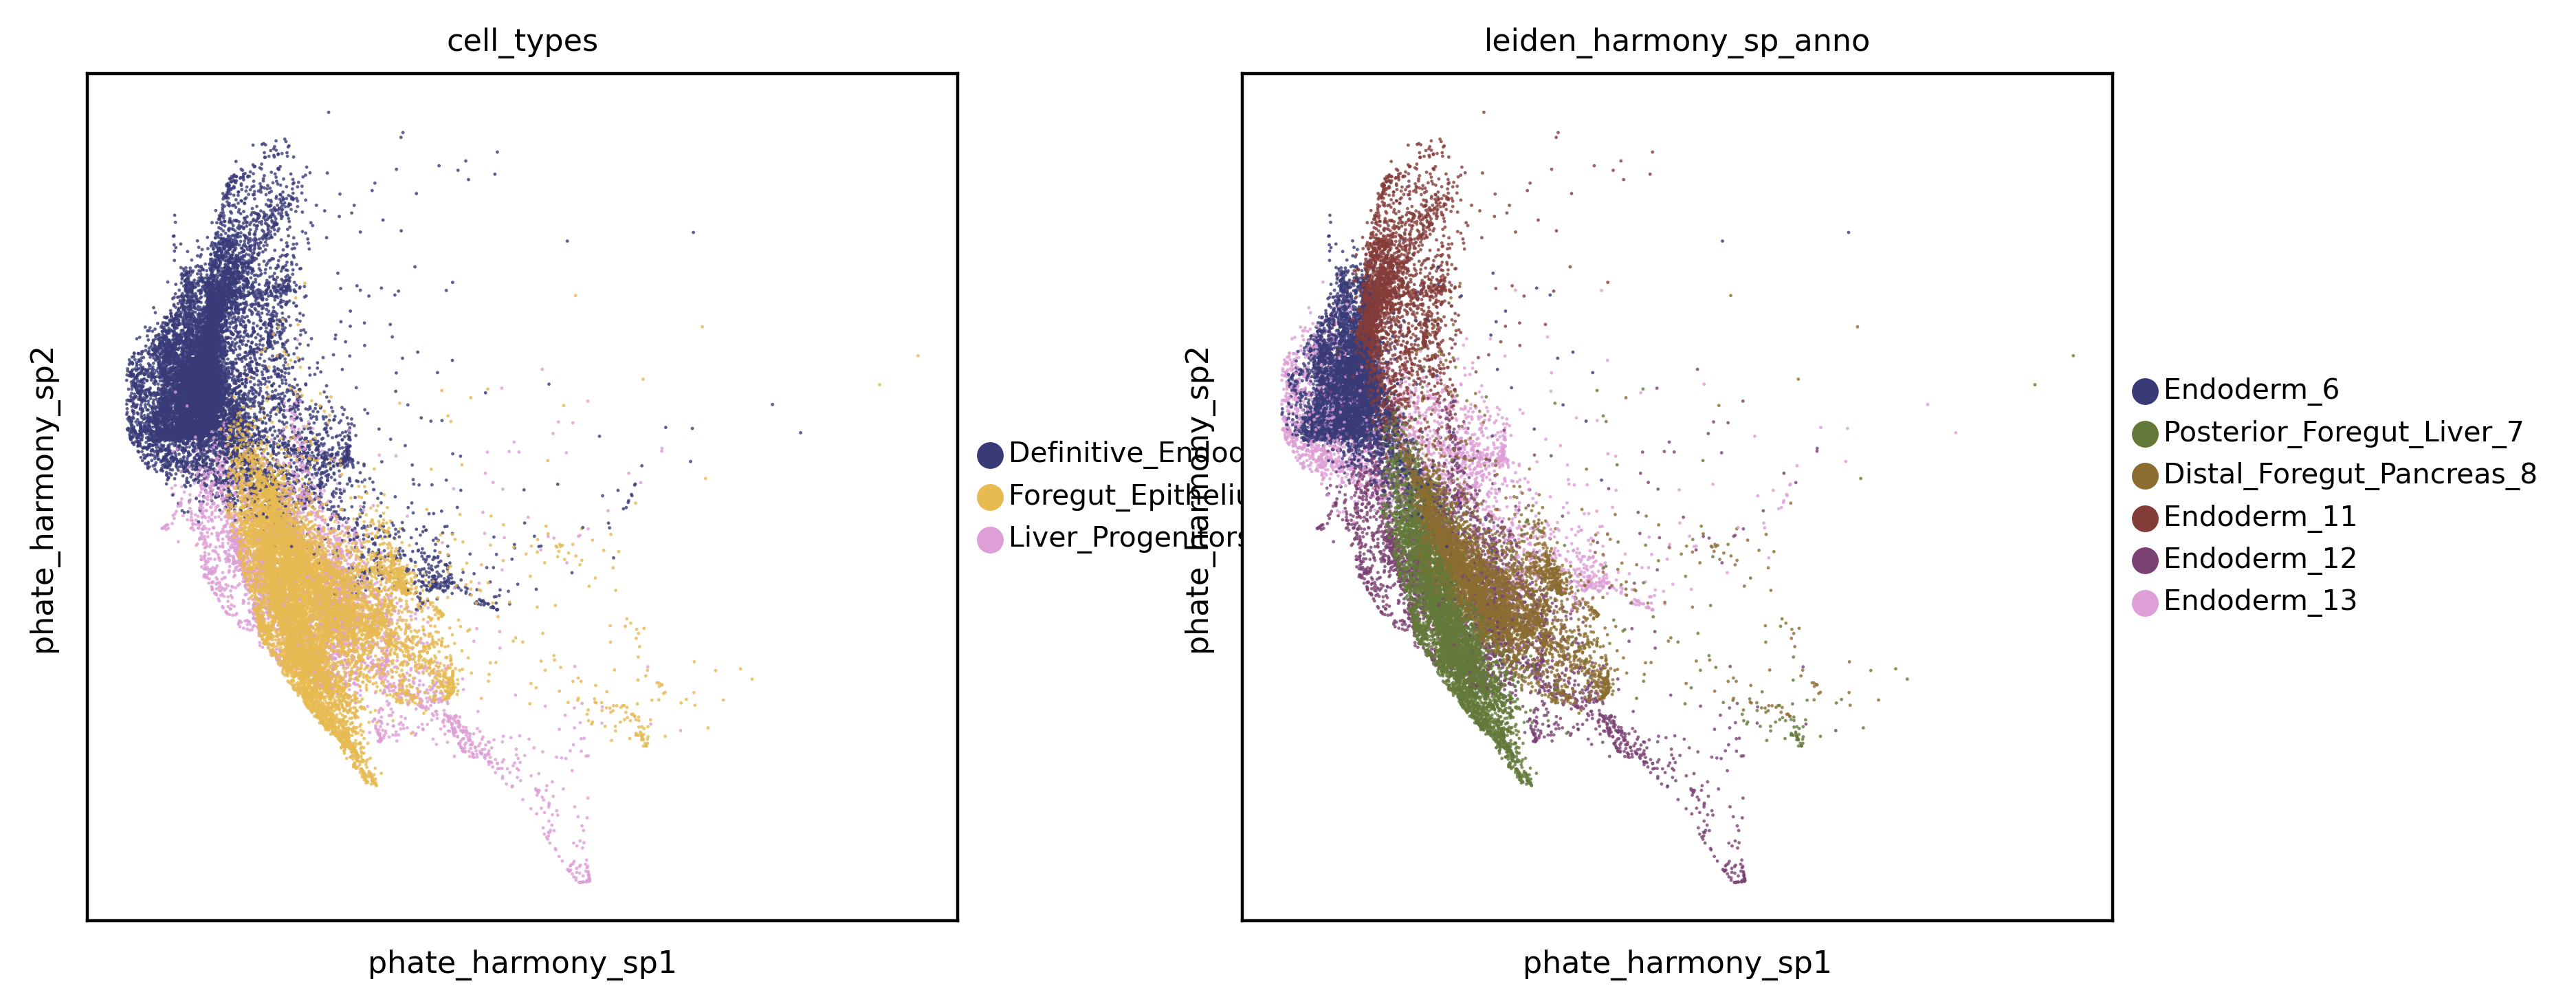

In [8]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    color=['cell_types','leiden_harmony_sp_anno'],
    # edges=True, edges_width=0.01, 
    # legend_loc='on data', legend_fontsize=6,legend_fontoutline=1, #labels on plot
    palette='tab20b',
    color_map='cividis',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)

# DGEA

In [14]:
groupby="leiden_harmony_sp_anno"
sc.tl.rank_genes_groups(
    adata, 
    groupby=groupby, 
    method='wilcoxon',
    layer='data',
    pts=True
)

In [15]:
tmp = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
print(tmp.iloc()[1:20,:])

       Endoderm_6 Posterior_Foregut_Liver_7 Distal_Foregut_Pancreas_8  \
1          PCAT14                      SAT1                      CDH6   
2   RP11-114G22.1                       AFP                   ONECUT2   
3             FRY                       TTR                      AMBP   
4         COLEC12                    HMGCS2                       CLU   
5         FAM184A                 LINC02889                     ANXA4   
6          COL4A6                      GATM                    MALAT1   
7        SERPINE2                    KCTD12                     DCDC2   
8            ANK3                     RAMP1                    ZBTB20   
9        ADAMTS12                      THRB                    LYPD6B   
10     AL163953.3                       VIM                     FRAS1   
11       ARHGAP24                    ANXA13                    IGFBP7   
12          FGF13                     MGST3                      NRG3   
13          FGFR1                     EFNB2        

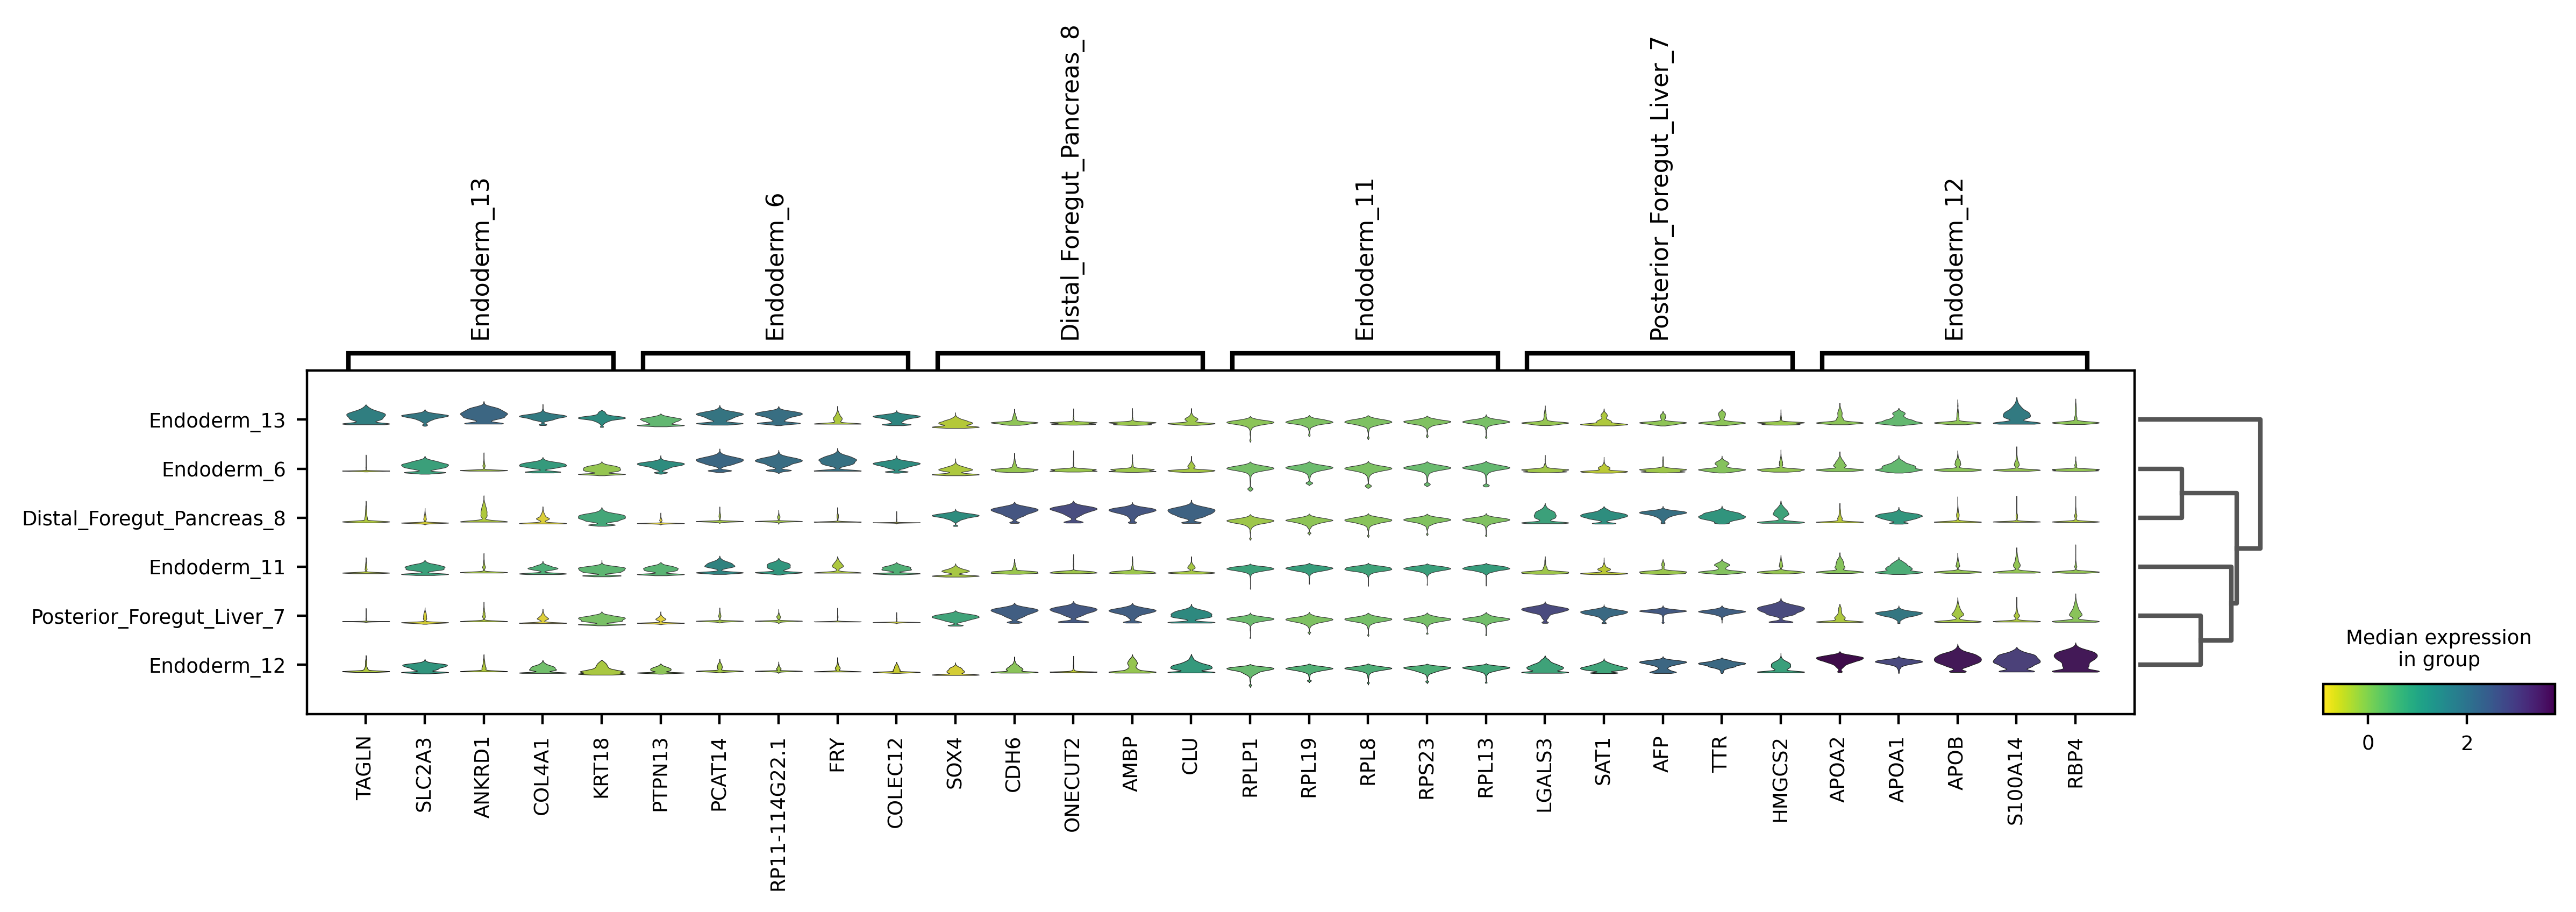

In [19]:
if False:
    sc.tl.dendrogram(
        adata,
        # groupby="leiden_harmony_sp_1.0",
        groupby=groupby,
        n_pcs = npcs(adata,reduction="harmony_sp"),
        use_rep="harmony_sp"
        # var_names=""
    )

# sc.pl.rank_genes_groups_tracksplot(
#     adata, 
#     n_genes=3
#     )

sc.pl.rank_genes_groups_stacked_violin(
    adata,
     n_genes=5, 
     cmap='viridis_r'
)

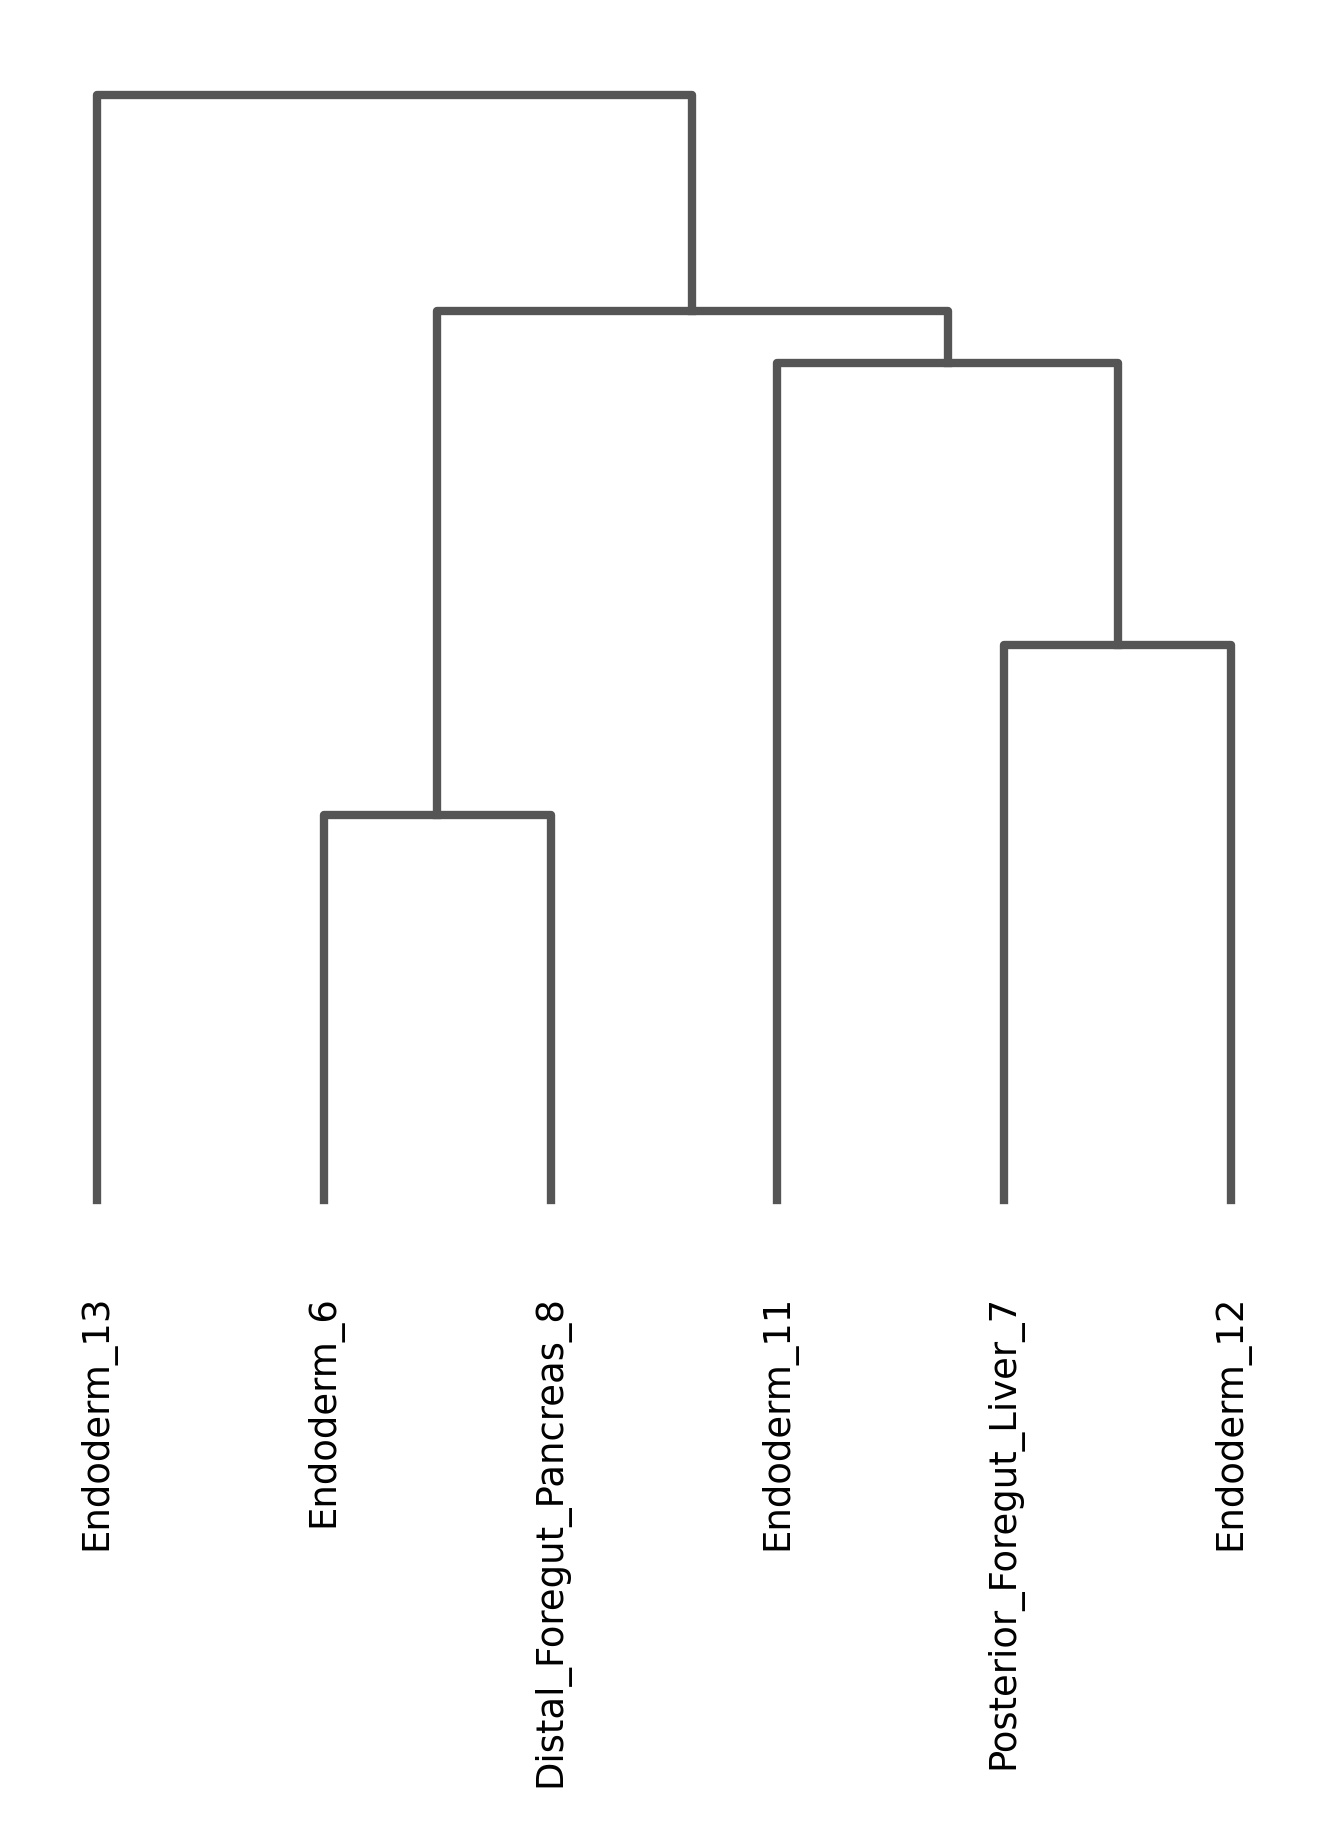

In [17]:
ax = sc.pl.dendrogram(adata, groupby)

# Re-compute PHATE embedding

In [12]:
import phate

In [13]:
phate_operator = phate.PHATE(
    knn=50,
#     decay=40,
    t='auto',
    mds_solver='smacof',
    n_jobs=32
)

# Use top N harmony dims which account for 95% of variance in harmony embedding
n_dims=npcs(adata,reduction="harmony_sp")
tmp_phate = phate_operator.fit_transform(adata.obsm["harmony_sp"][:,:n_dims]) 
adata.obsm['phate_harmony_sp'] = tmp_phate

Calculating PHATE...
  Running PHATE on 26053 observations and 45 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 74.47 seconds.
    Calculating affinities...
    Calculated affinities in 1.05 seconds.
  Calculated graph and diffusion operator in 76.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 8.85 seconds.
    Calculating KMeans...
    Calculated KMeans in 29.20 seconds.
  Calculated landmark operator in 40.38 seconds.
  Calculating optimal t...
    Automatically selected t = 33
  Calculated optimal t in 4.31 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.71 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 22.22 seconds.
Calculated PHATE in 145.75 seconds.


/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


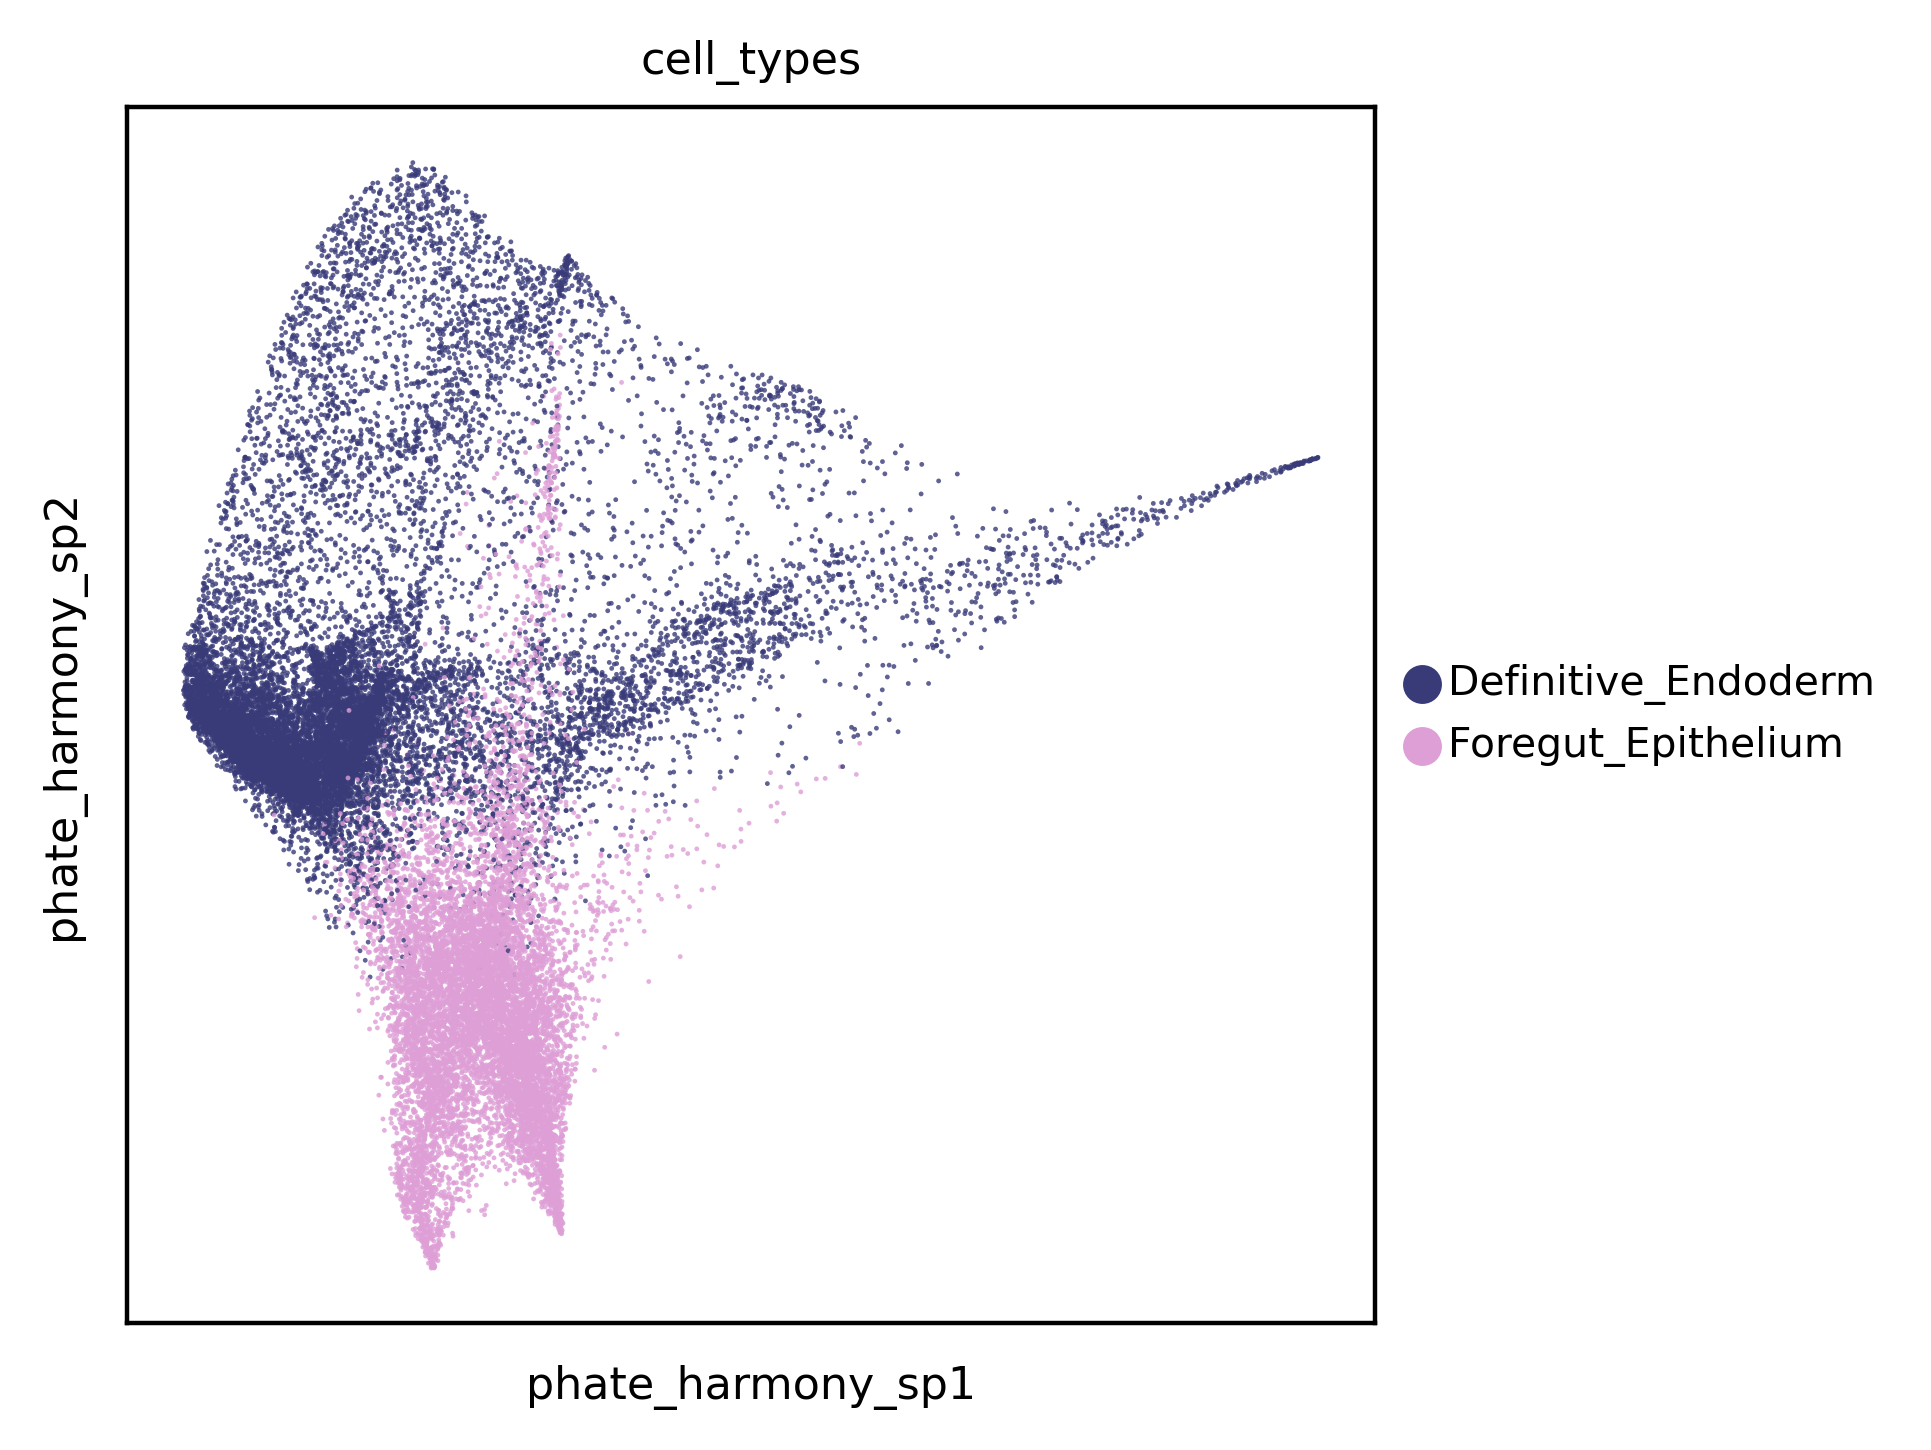

In [14]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    # color=['leiden_harmony_sp_10_types','pattern'], 
    color=['cell_types'],
    # edges=True, edges_width=0.01, 
    # legend_loc='on data', legend_fontsize=6,legend_fontoutline=1, #labels on plot
    palette='tab20b',
    color_map='cividis',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)